In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from utils import *

%matplotlib inline

In [27]:
data1 = pd.read_csv('../data/ex1data1.txt', header=None)
data1.columns = ['population', 'profit']
data1.head()
# data1.describe()
# data1.dtypes

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


# 2.1 Plotting the Data

Text(0, 0.5, 'Profit in $10,000s')

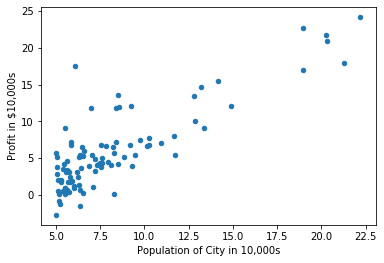

In [28]:
data1.plot(kind='scatter', x='population', y='profit')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

# 2.2 Gradient Descent

In [29]:
X,y = getData(data1)
init_theta = np.zeros([2,1])
alpha = 0.01
iterations = 1500

theta, J = gradientDescent(X, y, init_theta, alpha, iterations)

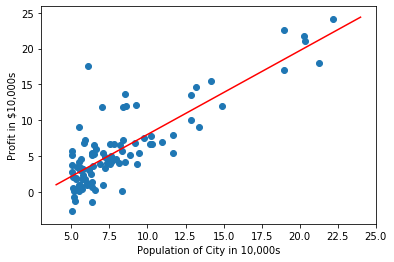

In [30]:
x_range = np.linspace(4,24)
pred = theta[0] + theta[1]*x_range

plt.figure()
plt.plot(x_range, pred, c='r')
plt.scatter(x='population', y='profit', data=data1)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

# 2.4 Visualizing J(θ)

In [31]:
X,y = getData(data1)

T0 = np.linspace(-10, 10, 500)
T1 = np.linspace(-1, 4, 500)

J = np.zeros([len(T0), len(T1)])

for i, t0 in enumerate(T0):
    for j, t1 in enumerate(T1):
        theta = np.array([[t0],
                          [t1]])
        J[i,j] = computeCost(X, y, theta)

meshT0,meshT1  = np.meshgrid(T0,T1)

Text(0.5, 1.0, 'Simplest default with labels')

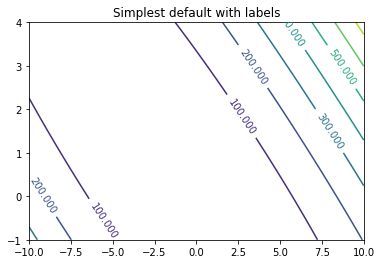

In [32]:
fig, ax = plt.subplots()
CS = ax.contour(meshT0, meshT1, J)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')

<IPython.core.display.Javascript object>


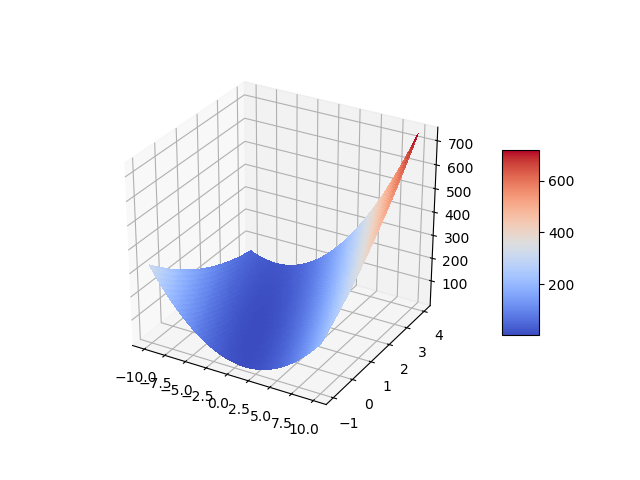

In [33]:
%matplotlib notebook

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(meshT0, meshT1, J, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()